# Data Augmentation To Address Overfitting In Flower Classification CNN

In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

# Load Flower Dataset

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 157s 1us/step


In [10]:
data_dir

'./datasets/flower_photos'

In [12]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg'))) 
print(image_count)

3670


In [17]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

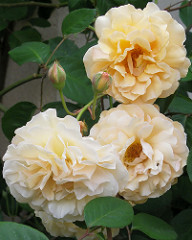

In [19]:
PIL.Image.open(str(roses[5]))

In [20]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

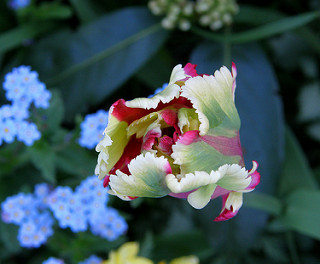

In [22]:
PIL.Image.open(tulips[10])

# Read flowers images from disk into numpy array using opencv


In [37]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [40]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [41]:
flowers_images_dict['daisy'][:5]

[PosixPath('datasets/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/521762040_f26f2e08dd.jpg'),
 PosixPath('datasets/flower_photos/daisy/7320089276_87b544e341.jpg')]

In [42]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [46]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(243, 500, 3)

In [47]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [53]:
#for flowers_names, images in flowers_images_dict.items():
     #print(flowers_names, ':', len(images))

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [56]:
X = np.array(X)
y = np.array(y)

# Train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 9)

In [58]:
print(len(X_train))
print(len(X_test))

2752
918


# Preprocessing: scale images

In [59]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [60]:
X_train_scaled[0]

array([[[0.37647059, 0.42352941, 0.43137255],
        [0.37254902, 0.42352941, 0.43137255],
        [0.56078431, 0.60784314, 0.6       ],
        ...,
        [0.07843137, 0.10588235, 0.09411765],
        [0.07843137, 0.10588235, 0.09411765],
        [0.10196078, 0.12941176, 0.11764706]],

       [[0.40784314, 0.43529412, 0.44705882],
        [0.45098039, 0.48627451, 0.49019608],
        [0.58823529, 0.61568627, 0.61176471],
        ...,
        [0.10980392, 0.1372549 , 0.1254902 ],
        [0.10588235, 0.13333333, 0.12156863],
        [0.13333333, 0.16078431, 0.14901961]],

       [[0.56470588, 0.59215686, 0.6       ],
        [0.54117647, 0.56862745, 0.56862745],
        [0.68627451, 0.70196078, 0.70588235],
        ...,
        [0.10588235, 0.13333333, 0.12156863],
        [0.14509804, 0.17254902, 0.16078431],
        [0.14901961, 0.17647059, 0.16470588]],

       ...,

       [[0.39607843, 0.43529412, 0.42745098],
        [0.22745098, 0.25490196, 0.25098039],
        [0.34901961, 0

# Build convolutional neural network and train it


In [62]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 33s 387ms/step - loss: 1.2567 - accuracy: 0.4702
Epoch 2/30
86/86 [==============================] - 32s 378ms/step - loss: 0.9294 - accuracy: 0.6243
Epoch 3/30
86/86 [==============================] - 33s 380ms/step - loss: 0.7364 - accuracy: 0.7122
Epoch 4/30
86/86 [==============================] - 32s 373ms/step - loss: 0.5517 - accuracy: 0.7947
Epoch 5/30
86/86 [==============================] - 28s 326ms/step - loss: 0.3274 - accuracy: 0.8906
Epoch 6/30
86/86 [==============================] - 29s 338ms/step - loss: 0.1975 - accuracy: 0.9375
Epoch 7/30
86/86 [==============================] - 29s 341ms/step - loss: 0.1107 - accuracy: 0.9677
Epoch 8/30
86/86 [==============================] - 31s 366ms/step - loss: 0.0497 - accuracy: 0.9887
Epoch 9/30
86/86 [==============================] - 32s 367ms/step - loss: 0.0352 - accuracy: 0.9913
Epoch 10/30
86/86 [==============================] - 27s 319ms/step - loss: 0.0276 - accura

In [63]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 90ms/step - loss: 2.9650 - accuracy: 0.6634


[2.964982748031616, 0.6633986830711365]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [67]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 85ms/step


array([[-12.55199   ,  17.92249   ,  -2.0607128 ,   1.7733145 ,
        -10.655362  ],
       [  0.14172639,  17.64754   ,  -9.103028  ,   0.76236475,
         -7.558057  ],
       [ -0.71436685, -10.064041  ,  -1.639858  ,  11.402618  ,
         16.530289  ],
       ...,
       [ 10.746396  ,   1.1177632 , -10.114891  ,  -2.9861689 ,
          7.4741683 ],
       [ -2.424215  , -17.530355  ,   4.5345764 ,  27.221525  ,
          9.393053  ],
       [  9.14032   ,   1.4664685 ,   0.8010069 , -12.3377285 ,
         14.749224  ]], dtype=float32)

In [71]:
score = tf.nn.softmax(predictions[0])

In [72]:
np.argmax(score)

1

In [74]:
print(y_test[0])

1


# Improve Test Accuracy Using Data Augmentation


In [76]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Original Image



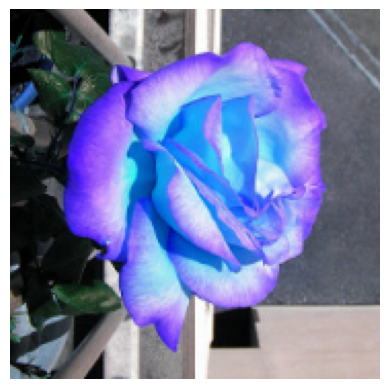

In [78]:
plt.axis('off')
plt.imshow(X[10])

Newly generated training sample using data augmentation



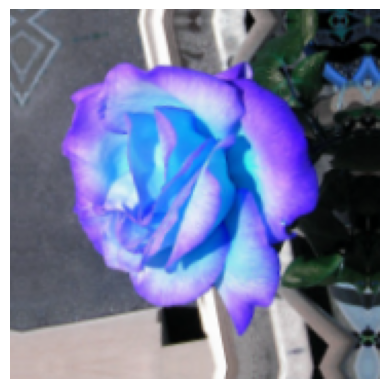

In [85]:
plt.axis('off')
plt.imshow(data_augmentation(X)[10].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer


In [81]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 30s 344ms/step - loss: 1.4368 - accuracy: 0.3797
Epoch 2/30
86/86 [==============================] - 33s 382ms/step - loss: 1.1421 - accuracy: 0.5356
Epoch 3/30
86/86 [==============================] - 31s 364ms/step - loss: 1.0555 - accuracy: 0.5825
Epoch 4/30
86/86 [==============================] - 35s 413ms/step - loss: 0.9643 - accuracy: 0.6239
Epoch 5/30
86/86 [==============================] - 30s 348ms/step - loss: 0.9056 - accuracy: 0.6606
Epoch 6/30
86/86 [==============================] - 31s 365ms/step - loss: 0.8424 - accuracy: 0.6766
Epoch 7/30
86/86 [==============================] - 33s 379ms/step - loss: 0.8149 - accuracy: 0.6813
Epoch 8/30
86/86 [==============================] - 33s 379ms/step - loss: 0.7732 - accuracy: 0.7002
Epoch 9/30
86/86 [==============================] - 33s 383ms/step - loss: 0.7513 - accuracy: 0.7097
Epoch 10/30
86/86 [==============================] - 32s 375ms/step - loss: 0.6963 - accura

In [83]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 87ms/step - loss: 0.8223 - accuracy: 0.7516


[0.8223015069961548, 0.7516340017318726]

# You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 75.16%